# Data Analysis

In this notebook, I'll try to get a better understanding of the data so I can find relationships in the various factors and Dengue.

## Load libraries

I'll load in the libraries to read data and draw visualizations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load data

I'll start by loading in the data and looking at the first few rows.

In [2]:
dataset = pd.read_csv("data/iquitos/combined_data.csv")
dataset.head()

,date,population,TMAX,TMIN,TAVG,TDTR,PRCP(-1),PRCP(-2),PRCP,total_cases
0,2000-07,386666,31.458333,20.325000,25.916667,11.133333,85.8,309.3,97.3,0
1,2000-08,386666,32.864706,21.170588,27.017647,11.694118,97.3,85.8,225.2,0
2,2000-09,386666,33.300000,20.925000,27.108333,12.375000,225.2,97.3,247.1,1
3,2000-10,386666,33.163636,21.709091,27.436364,11.454545,247.1,225.2,81.2,2
4,2000-11,386666,33.400000,21.550000,27.475000,11.850000,81.2,247.1,25.4,0


## Dataframe Analysis

In this section, I'll explore dataset level factors and adjust things if needed.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         156 non-null    object 
 1   population   156 non-null    int64  
 2   TMAX         154 non-null    float64
 3   TMIN         154 non-null    float64
 4   TAVG         154 non-null    float64
 5   TDTR         154 non-null    float64
 6   PRCP(-1)     154 non-null    float64
 7   PRCP(-2)     154 non-null    float64
 8   PRCP         154 non-null    float64
 9   total_cases  156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


The temperate columns have a couple of missing data points and thus, I'd simply replace the value with the average value of the previous and next months.

In [4]:
dataset[dataset.isnull().any(axis=1)]

,date,population,TMAX,TMIN,TAVG,TDTR,PRCP(-1),PRCP(-2),PRCP,total_cases
95,2008-06,436185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
131,2011-06,452757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


However, after looking at the two rows, we have no data what so ever and thus it is much better if I drop these two rows completely.

In [5]:
dataset = dataset.dropna(how = 'any').reset_index()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        154 non-null    int64  
 1   date         154 non-null    object 
 2   population   154 non-null    int64  
 3   TMAX         154 non-null    float64
 4   TMIN         154 non-null    float64
 5   TAVG         154 non-null    float64
 6   TDTR         154 non-null    float64
 7   PRCP(-1)     154 non-null    float64
 8   PRCP(-2)     154 non-null    float64
 9   PRCP         154 non-null    float64
 10  total_cases  154 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 13.4+ KB


Perfect! There are no more null values. We can start with our exploratory data analysis.

In [6]:
dataset.describe()

,index,population,TMAX,TMIN,TAVG,TDTR,PRCP(-1),PRCP(-2),PRCP,total_cases
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,77.038961,426292.207792,32.620067,22.167542,27.393276,10.452525,117.631818,119.196753,118.308442,33.110390
std,45.241095,22335.718451,0.927325,0.715594,0.616568,1.108211,93.774068,94.949007,93.918700,44.781176
min,0.000000,386666.000000,30.200000,19.150000,25.700000,8.071429,5.000000,5.000000,5.000000,0.000000
25%,38.250000,405988.000000,31.978788,21.671250,26.983654,9.685000,49.025000,49.025000,49.025000,8.000000
50%,76.500000,424247.000000,32.603750,22.223377,27.463333,10.518651,91.350000,91.900000,91.900000,21.000000
75%,115.750000,447467.000000,33.337500,22.753205,27.865625,11.151190,170.875000,176.450000,176.450000,38.750000
max,155.000000,462783.000000,34.866667,23.450000,28.658333,13.150000,514.300000,514.300000,514.300000,328.000000


The values vary greatly and it'll be a good step to standardize all values before we try to model on the data.

I'll also drop the `index` and `date` as I no longer need them.

In [7]:
dataset = dataset.drop(['index', 'date'], axis = 1)

## Exploratory Data Analysis

With a complete dataframe, let's try to do analysis on the columns and see the effect.

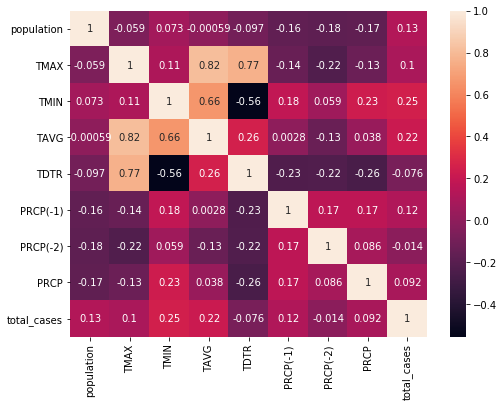

In [8]:
plt.figure(figsize = (8, 6))
sns.heatmap(dataset.corr(), annot = True)

If we observe the last column which shows the correlation of each factor with the total cases of Dengue, we observe that the correlations are not very strong. The most correlated variable is the **minimum temperature** and **average temperature**. The correlation is not very strong between the precipitation values except that the **last month's precipitation** has some effect.

The correlation for `TMIN` and `TAVG` could be attributed to they representing the same quantity. Let's drop `TAVG`. I'll also drop `TDTR`, `PRCP` and `PRCP(-2)` due to their small correlation.

In [9]:
dataset = dataset.drop(['TDTR', 'TAVG', 'PRCP', 'PRCP(-2)'], axis = 1)

The correlation between the last month's precipitation is the strongest implying that we should also look into the correlation between the last month's temperature values and see their effect on the Dengue cases.

In [10]:
tmin_1 = np.insert(np.array(dataset['TMIN'][:-1]), 0, 0)
tmin_2 = np.insert(tmin_1[:-1], 0, 0)

dataset['TMIN(-1)'] = tmin_1
dataset['TMIN(-2)'] = tmin_2

tmax_1 = np.insert(np.array(dataset['TMAX'][:-1]), 0, 0)
tmax_2 = np.insert(tmax_1[:-1], 0, 0)

dataset['TMAX(-1)'] = tmax_1
dataset['TMAX(-2)'] = tmax_2

I'll ignore the first two rows as they are no longer useful.

In [11]:
dataset = dataset[2:].reset_index(drop = True)

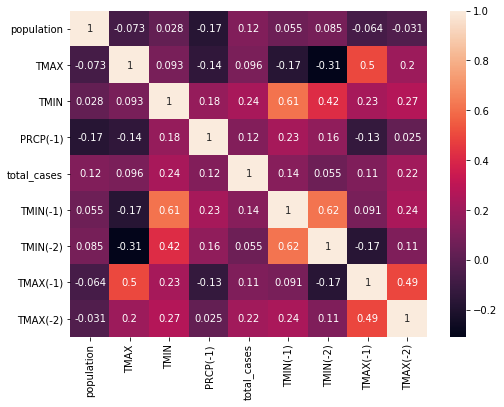

In [12]:
plt.figure(figsize = (8, 6))
sns.heatmap(dataset.corr(), annot = True)

We start by observing the `total_cases` column in the above hearmap. `TMAX` does not have a strong correlation but the maximum from the past two months do. `TMIN` has correlation including the past month only.

I'll now drop all columns which I believe have very small correlation and are not needed.

In [13]:
dataset = dataset.drop(['TMAX', 'TMIN(-2)'], axis = 1)

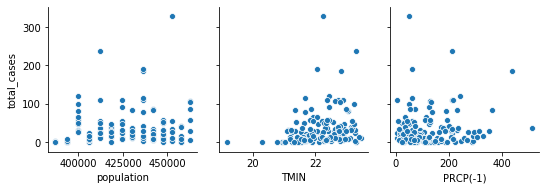

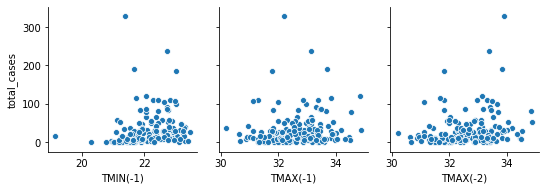

In [14]:
for i in range(0, len(dataset.columns), 4):
    sns.pairplot(data=dataset,
                x_vars=dataset.columns[i:i+3],
                y_vars=['total_cases'])

From the pair plots, we observe that there is a lot of variability between each columna and total Dengue cases and there will not a single direct factor causing a huge effect towards a Dengue outbreak.

As I've updated the dataframe to update new columns, I'll save it back to the disk for easy consumption.

In [15]:
dataset.to_csv("data/iquitos/analyzed_data.csv", index = False)